# Four Wheeler Insurance Customer LifeTime Value Prediction <html><font size ="2"> &nbsp;&nbsp;&nbsp;&nbsp;BY DHEERAJ KUMAR</html>

# PROJECT GOAL
<br>

The **Requirement** of a Business Problem **is to develop a predictive model to Analyse and to Predit the LifeTime Value of customer** in a Four wheeler insurance company using **Regresson Analysis** with **Python**.

# FEATURES DETAILS


<br>
<html>
<head>
<style>
table {
  font-family: arial, sans-serif;
  border-collapse: collapse;
  width: 100%;
}

td, th {
  border: 1px solid #dddddd;
  text-align: left;
  padding: 8px;
}

tr:nth-child(even) {
  background-color: #dddddd;
}
</style>
</head>
<body>

<h2></h2>

<table>
  <tr>
    <th>FEATURE NAMES</th>
    <th>EXPLANATION</th>

  </tr>
  <tr>
    <td><b>CustomerID</b></td>
    <td>ID of the Customer</td>

  </tr>
  <tr>
      <td><b>Customer Lifetime Value</b></td>
    <td>Life Time Profit to the owner by Customer</b></td>
  
  </tr>
  <tr>
    <td><b>Coverage</b></td>
    <td>Insurance Coverge to vehicle<b>[Categorical Variable]</td>
 
  </tr>
  <tr>
    <td><b>Education</b></td>
    <td>Customer Education<b>[Categorical Variable]</b></td>
 
  </tr>
  <tr>
    <td><b>Employment Status</b></td>
    <td>Employment Status of Customer<b>[Categorical Variable]</td>

  </tr>
  <tr>
    <td><b>Gender</b></td>
    <td>Gender of Customer <b>[Categorical Variable]</b></td>

  </tr>
    <tr>
        <td><b>Income</b></td>
    <td>Income of Customer </b></td>

  </tr>
    <tr>
    <td><b>Location Geo</b></td>
    <td>Latitude and Longitude of Customer <b>[Categorical Variable]</b></td>

  </tr>
    <tr>
    <td><b>Location Code</b></td>
    <td>Location Code of Customer <b>[Categorical Variable]</b></td>

  </tr>
    <tr>
    <td><b>Marital Status</b></td>
    <td>Marital Status of Customer <b>[Categorical Variable]</b></td>

  </tr>
    <tr>
    <td><b>Monthly Premium Auto</b></td>
    <td>Monthly Premium Amount of Customers</td>

  </tr>
    <tr>
    <td><b>Months Since Last Claim</b></td>
    <td>Last Insurance pay of Customer</td>

  </tr>
    <tr>
    <td><b>Months Since Policy Inception</b></td>
    <td>Policy Inception of a Customer</td>

  </tr>
    <tr>
    <td><b>Number of Open Complaints</b></td>
    <td>Open Complaints of a Customer</b></td>

  </tr>
    <tr>
    <td><b>Number of Policies</b></td>
    <td>Number of Policies of Customer </b></td>

  </tr>
  <tr>
    <td><b>Policy Type</b></td>
    <td>Policy Type of Customer <b>[Categorical Variable]</b></td>

  </tr>
  <tr>
    <td><b>Policy</b></td>
    <td>Policy taken by Customer <b>[Categorical Variable]</b></td>

  </tr>
  <tr>
    <td><b>Renew Offer Type</b></td>
    <td>Renew Offers type for Customer <b>[Categorical Variable]</b></td>

  </tr>
  <tr>
    <td><b>Sales Channel</b></td>
    <td>Sales Channel of Customer<b>[Categorical Variable] </b></td>

  </tr>
  <tr>
    <td><b>Total Claim Amount</b></td>
    <td>Total Claim Amount of Customers </b></td>

  </tr>
  <tr>
    <td><b>Vehicle Class</b></td>
    <td>Vehicle Class of Customers <b>[Categorical Variable]</b></td>

  </tr>
  <tr>
    <td><b>Vehicle Size</b></td>
    <td>Vehicle Size of Customers </b></td>

  </tr>
</table>

</body>
</html>


# Import Libraries

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

# Loader Function to Load Dataframe

In [12]:
path ="D:\Data Science Python Programs\Terra Final Deployment\CLV_Train.csv"
class DataFrame_Loader():
    data = path
    
    def __init__(self):
        
        print("Loadind DataFrame")
        
    def read_csv(self,data):
        self.df = pd.read_csv(data)
        
    def load_csv(self):
        return self.df

In [13]:
data = DataFrame_Loader()

Loadind DataFrame


In [14]:
data.read_csv(path)

In [15]:
df=data.load_csv()

# Exploratory Data Analysis

In [16]:
class Attribute_Information():

    def __init__(self):
        
        print("Attribute Information object created")
        
    def Column_information(self,df):
    
        data_info = pd.DataFrame(
                                columns=['No of observation',
                                        'No of Variables',
                                        'No of Numerical Variables',
                                        'No of Factor Variables',
                                        'No of Categorical Variables',
                                        'No of Logical Variables',
                                        'No of Date Variables',
                                        'No of zero variance variables'])


        data_info.loc[0,'No of observation'] = df.shape[0]
        data_info.loc[0,'No of Variables'] = df.shape[1]
        data_info.loc[0,'No of Numerical Variables'] = df._get_numeric_data().shape[1]
        data_info.loc[0,'No of Factor Variables'] = df.select_dtypes(include='category').shape[1]
        data_info.loc[0,'No of Logical Variables'] = df.select_dtypes(include='bool').shape[1]
        data_info.loc[0,'No of Categorical Variables'] = df.select_dtypes(include='object').shape[1]
        data_info.loc[0,'No of Date Variables'] = df.select_dtypes(include='datetime64').shape[1]
        data_info.loc[0,'No of zero variance variables'] = df.loc[:,df.apply(pd.Series.nunique)==1].shape[1]

        data_info =data_info.transpose()
        data_info.columns=['value']
        data_info['value'] = data_info['value'].astype(int)


        return data_info

    def __get_missing_values(self,data):
        
        #Getting sum of missing values for each feature
        missing_values = data.isnull().sum()
        #Feature missing values are sorted from few to many
        missing_values.sort_values(ascending=False, inplace=True)
        
        #Returning missing values
        return missing_values

    def Generate_Schema(self,data):
        
        feature_dtypes=data.dtypes
        self.missing_values=self.__get_missing_values(data)

        print("=" * 110)

        print("{:16} {:16} {:20} {:16}".format("Feature Name".upper(),
                                            "Data Type".upper(),
                                            "# of Missing Values".upper(),
                                            "Samples".upper()))
        for feature_name, dtype, missing_value in zip(self.missing_values.index.values,
                                                      feature_dtypes[self.missing_values.index.values],
                                                      self.missing_values.values):
            print("{:18} {:19} {:19} ".format(feature_name, str(dtype), str(missing_value)), end="")
            for v in data[feature_name].values[:5]:
                print(v, end=",")
            print()

        print("="*110)
        
    def Agg_Tabulation(self,data):
        
        print("=" * 110)
        print("Aggregation of Table")
        print("=" * 110)
        table = pd.DataFrame(data.dtypes,columns=['dtypes'])
        table1 =pd.DataFrame(data.columns,columns=['Names'])
        table = table.reset_index()
        table= table.rename(columns={'index':'Name'})
        table['No of Missing'] = data.isnull().sum().values    
        table['No of Uniques'] = data.nunique().values
        table['Percent of Missing'] = ((data.isnull().sum().values)/ (data.shape[0])) *100
        table['First Observation'] = data.loc[0].values
        table['Second Observation'] = data.loc[1].values
        table['Third Observation'] = data.loc[2].values
        for name in table['Name'].value_counts().index:
            table.loc[table['Name'] == name, 'Entropy'] = round(stats.entropy(data[name].value_counts(normalize=True), base=2),2)
        return table
    
        print("=" * 110)
        
    def __iqr(self,x):
        return x.quantile(q=0.75) - x.quantile(q=0.25)

    def __outlier_count(self,x):
        upper_out = x.quantile(q=0.75) + 1.5 * self.__iqr(x)
        lower_out = x.quantile(q=0.25) - 1.5 * self.__iqr(x)
        return len(x[x > upper_out]) + len(x[x < lower_out])

    def num_count_summary(self,df):
        df_num = df._get_numeric_data()
        data_info_num = pd.DataFrame()
        i=0
        for c in  df_num.columns:
            data_info_num.loc[c,'Negative values count']= df_num[df_num[c]<0].shape[0]
            data_info_num.loc[c,'Positive values count']= df_num[df_num[c]>0].shape[0]
            data_info_num.loc[c,'Zero count']= df_num[df_num[c]==0].shape[0]
            data_info_num.loc[c,'Unique count']= len(df_num[c].unique())
            data_info_num.loc[c,'Negative Infinity count']= df_num[df_num[c]== -np.inf].shape[0]
            data_info_num.loc[c,'Positive Infinity count']= df_num[df_num[c]== np.inf].shape[0]
            data_info_num.loc[c,'Missing Percentage']= df_num[df_num[c].isnull()].shape[0]/ df_num.shape[0]
            data_info_num.loc[c,'Count of outliers']= self.__outlier_count(df_num[c])
            i = i+1
        return data_info_num
    
    def statistical_summary(self,df):
    
        df_num = df._get_numeric_data()

        data_stat_num = pd.DataFrame()

        try:
            data_stat_num = pd.concat([df_num.describe().transpose(),
                                       pd.DataFrame(df_num.quantile(q=0.10)),
                                       pd.DataFrame(df_num.quantile(q=0.90)),
                                       pd.DataFrame(df_num.quantile(q=0.95))],axis=1)
            data_stat_num.columns = ['count','mean','std','min','25%','50%','75%','max','10%','90%','95%']
        except:
            pass

        return data_stat_num

In [17]:
Info = Attribute_Information()

Attribute Information object created


In [18]:
Info.Column_information(df)

,value
No of observation,9806
No of Variables,22
No of Numerical Variables,9
No of Factor Variables,0
No of Categorical Variables,13
No of Logical Variables,0
No of Date Variables,0
No of zero variance variables,0


In [19]:
Info.Generate_Schema(df)

FEATURE NAME     DATA TYPE        # OF MISSING VALUES  SAMPLES         
Coverage           object              925                 Basic,Basic,Basic,Basic,Basic,
Policy.Type        object              891                 Personal Auto,Personal Auto,Personal Auto,Corporate Auto,Personal Auto,
Number.of.Open.Complaints float64             818                 nan,0.0,0.0,nan,0.0,
Monthly.Premium.Auto float64             794                 67.0,101.0,108.0,116.0,72.0,
Education          object              129                 Bachelor,College,High School or Below,College,Bachelor,
Gender             object              129                 F,M,F,M,F,
Marital.Status     object              129                 Married,Married,Married,Married,Married,
Sales.Channel      object              128                 Branch,Agent,Branch,Branch,Web,
Renew.Offer.Type   object              128                 Offer2,Offer2,Offer2,Offer1,Offer2,
Vehicle.Class      object              126                 

In [20]:
Info.Agg_Tabulation(df)

Aggregation of Table


,Name,dtypes,No of Missing,No of Uniques,Percent of Missing,First Observation,Second Observation,Third Observation,Entropy
0,CustomerID,int64,0,9806,0.000000,5917,2057,4119,13.26
1,Customer.Lifetime.Value,float64,0,6477,0.000000,7824.37,8005.96,8646.5,12.40
2,Coverage,object,925,3,9.433000,Basic,Basic,Basic,1.28
3,Education,object,129,5,1.315521,Bachelor,College,High School or Below,2.02
4,EmploymentStatus,object,118,5,1.203345,Unemployed,Employed,Employed,1.50
5,Gender,object,129,2,1.315521,F,M,F,1.00
6,Income,object,0,4622,0.000000,0,63357,64125,9.67
7,Location.Geo,object,0,2840,0.000000,"17.7,77.7","28.8,76.6","21.6,88.4",10.91
8,Location.Code,object,119,3,1.213543,Urban,Suburban,Urban,1.30
9,Marital.Status,object,129,3,1.315521,Married,Married,Married,1.37


In [21]:
Info.num_count_summary(df)

,Negative values count,Positive values count,Zero count,Unique count,Negative Infinity count,Positive Infinity count,Missing Percentage,Count of outliers
CustomerID,0.0,9806.0,0.0,9806.0,0.0,0.0,0.000000,0.0
Customer.Lifetime.Value,0.0,9806.0,0.0,6477.0,0.0,0.0,0.000000,883.0
Monthly.Premium.Auto,0.0,9012.0,0.0,192.0,0.0,0.0,0.080971,432.0
Months.Since.Last.Claim,0.0,9510.0,296.0,36.0,0.0,0.0,0.000000,0.0
Months.Since.Policy.Inception,0.0,9712.0,94.0,100.0,0.0,0.0,0.000000,0.0
Number.of.Open.Complaints,0.0,1858.0,7130.0,7.0,0.0,0.0,0.083418,1858.0
Number.of.Policies,0.0,9685.0,0.0,10.0,0.0,0.0,0.012339,446.0
Total.Claim.Amount,0.0,9806.0,0.0,4125.0,0.0,0.0,0.000000,495.0
Vehicle.Size,0.0,9680.0,0.0,4.0,0.0,0.0,0.012849,2885.0


In [22]:
Info.statistical_summary(df)

,count,mean,std,min,25%,50%,75%,max,10%,90%,95%
CustomerID,9806.0,5778.381807,3343.286093,1.000000,2879.250000,5783.000000,8678.750000,11573.000000,1136.500000,10416.500000,11005.750000
Customer.Lifetime.Value,9806.0,7998.047015,6848.055899,1898.007675,4013.949039,5780.182197,8960.280213,83325.381190,2666.503548,15431.849630,22060.912547
Monthly.Premium.Auto,9012.0,93.340657,34.417763,61.000000,68.750000,83.000000,109.000000,297.000000,64.000000,129.000000,165.000000
Months.Since.Last.Claim,9806.0,15.143993,10.004327,0.000000,6.000000,14.000000,23.000000,35.000000,2.000000,30.000000,33.000000
Months.Since.Policy.Inception,9806.0,48.165001,27.963630,0.000000,24.000000,48.000000,71.750000,99.000000,10.000000,87.000000,93.000000
Number.of.Open.Complaints,8988.0,0.379172,0.896427,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,1.000000,3.000000
Number.of.Policies,9685.0,2.960351,2.389801,1.000000,1.000000,2.000000,4.000000,9.000000,1.000000,7.000000,8.000000
Total.Claim.Amount,9806.0,438.266734,293.502301,0.099007,280.352767,384.007015,553.540973,2893.239678,104.306060,783.809167,964.800000
Vehicle.Size,9680.0,2.089773,0.538524,1.000000,2.000000,2.000000,2.000000,3.000000,1.000000,3.000000,3.000000


# Haversine distance Computaion

In [12]:
import math

class Compute_Haversine_Distance():

    def __init__(self):
        print("Distance object created")

    def Split_Location_geo(self,Location_Geo):
        df['Lati'], df['Longi'] = df['Location.Geo'].str.split(',', 1).str

    def harvasine_distance(self,lati,longi):
        df['Lati']= pd.to_numeric(df['Lati'],errors='coerce')
        df['Longi']= pd.to_numeric(df['Longi'],errors='coerce')
        df['LAT_rad'],df['LON_rad'] = np.radians(df['Lati']), np.radians(df['Longi'])
        df['dLON'] = df['LON_rad'] - math.radians(-56.7213600)
        df['dLAT'] = df['LAT_rad'] - math.radians(37.2175900)
        df['distance'] = 6367 * 2 * np.arcsin(np.sqrt(np.sin(df['dLAT']/2)**2 + math.cos(math.radians(37.2175900)) * np.cos(df['LAT_rad']) * np.sin(df['dLON']/2)**2))

In [13]:
distance = Compute_Haversine_Distance()

Distance object created


In [14]:
distance.Split_Location_geo(df)

In [15]:
distance.harvasine_distance(df['Lati'],df['Longi'])

# Data Preprocessing

In [16]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
class Imputer(Attribute_Information):

    def __init__(self):
        print("Imputation object created")
        
    def fit(self, data):

        self.fill = pd.Series([data[column].value_counts().index[0]
            if data[column].dtype == np.dtype('O') else data[column].mean() for column in data],
            index=data.columns)

        return self

    def transform(self, data):
        return data.fillna(self.fill)

In [17]:
impute = Imputer()

Imputation object created


In [18]:
impute.fit(df)

In [19]:
df=impute.transform(df)

# Feature Engineering

In [20]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
col_list=['Renew.Offer.Type','Policy.Type']
nondummy=['CustomerID','Customer.Lifetime.Value','Income','Location.Geo','Months.Since.Policy.Inception','Number.of.Open.Complaints','Number.of.Policies','Total.Claim.Amount','Vehicle.Size']
class Base_Feature_Engineering(Imputer):

    def __init__(self):
        print("Feature Engineering object created")
    
    def _Label_Encoding(self,data):
        category_col =[var for var in data.columns if data[var].dtypes =="object"] 
        labelEncoder = preprocessing.LabelEncoder()
        mapping_dict={}
        for col in category_col:
            data[col] = labelEncoder.fit_transform(data[col])
            le_name_mapping = dict(zip(labelEncoder.classes_, labelEncoder.transform(labelEncoder.classes_)))
            mapping_dict[col]=le_name_mapping
            return mapping_dict

    def _get_dummies(self, data, prefered_columns=None):

        if prefered_columns is None:
            columns=data.columns.values
            non_dummies=None
        else:
            non_dummies=[col for col in data.columns.values if col not in prefered_columns ]

            columns=prefered_columns


        dummies_data=[pd.get_dummies(data[col],prefix=col) for col in columns]

        if non_dummies is not None:
            for non_dummy in non_dummies:
                dummies_data.append(data[non_dummy])

        return pd.concat(dummies_data, axis=1)

In [21]:
FE = Base_Feature_Engineering()

Feature Engineering object created


In [35]:
FE._Label_Encoding(df)

# Dropper Function to drop unwanted variables

In [36]:
col_list=['CustomerID','Location.Geo','Lati', 'Longi', 'LAT_rad', 'LON_rad', 'dLON', 'dLAT']
class Column_Dopper():

    def __init__(self):
        print("Column Dopper object created")
    
    def dropper(self,x):
        data=[]
        for i in x.columns:
            if i not in col_list:
                data.append(i)
        return df[data]

    def remove_outliers(self,data):
        q1 =df['Customer.Lifetime.Value'].quantile(.25)
        q3 = df['Customer.Lifetime.Value'].quantile(.75)
        iqr = q3-q1
        df_out = df[~((df['Customer.Lifetime.Value'] < (q1 - 1.5 *iqr))  |  (df['Customer.Lifetime.Value'] > (q3+ 1.5 * iqr)))]
        return df_out

In [37]:
drop = Column_Dopper()

Column Dopper object created


In [38]:
df=drop.dropper(df)

In [39]:
df=drop.remove_outliers(df)

# Model Selection using KFold CrossValidation

In [40]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

class Model_Selector():

    def __init__(self,n_estimators=100,random_state=42,max_depth=10):
        print("Model Selector object created")
        
    def Regression_Model_Selector(self,df):
        seed = 42
        models = []
        models.append(("LR", LinearRegression()))
        models.append(("RF", RandomForestRegressor()))
        models.append(("KNN", KNeighborsRegressor()))
        models.append(("CART", DecisionTreeRegressor()))
        models.append(("XGB", XGBRegressor()))
        result = []
        names = []
        scoring = 'r2'
        seed = 42

        for name, model in models:
            x = df.drop(['Customer.Lifetime.Value'],axis=1)
            y = df['Customer.Lifetime.Value']
            x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
            kfold = KFold(n_splits = 5, random_state =seed)# 5 split of data (value of k)
            cv_results = cross_val_score(model, x_train, y_train, cv = kfold, scoring = scoring)
            result.append(cv_results)
            names.append(name)
            msg = (name, cv_results.mean(), cv_results.std())
            print(msg)
        fig = plt.figure(figsize = (8,4))
        fig.suptitle('Algorithm Comparison')
        ax = fig.add_subplot(1,1,1)
        plt.boxplot(result)
        ax.set_xticklabels(names)
        plt.show()

In [41]:
MS = Model_Selector()

Model Selector object created


('LR', 0.2613369195640027, 0.014112291521644732)
('RF', 0.9038115614584772, 0.010653640248164065)
('KNN', -0.006567615444889552, 0.030291831888887105)
('CART', 0.8073864143405199, 0.012799520410164918)
('XGB', 0.905098402905435, 0.009717459013021327)


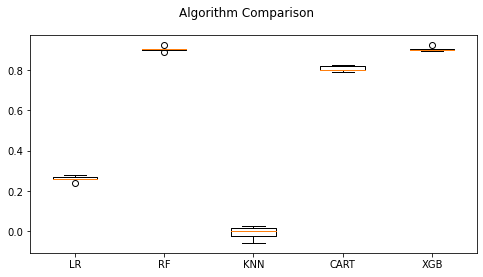

In [42]:
MS.Regression_Model_Selector(df)

# Model Building

In [46]:
import statsmodels.api as sm
class Data_Modelling():

    def __init__(self,n_estimators=100,random_state=42,max_depth=10):
        print("Data Modelling object created")
        
    def OLS_Summary(self,data):
        x = df.drop(['Customer.Lifetime.Value'],axis=1)
        y = df['Customer.Lifetime.Value']
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
        model2 =sm.OLS(y_train,x_train).fit()
        return model2.summary()
        
    def Linear_Regression_Model(self,df):
        x = df.drop(['Customer.Lifetime.Value'],axis=1)
        y = df['Customer.Lifetime.Value']
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
        regressor = LinearRegression()
        reg=regressor.fit(x_train,y_train)
        LR_pred=regressor.predict(x_test)
        LR_RMSE = np.sqrt(metrics.mean_squared_error(y_test,LR_pred))
        LR_r2_score = r2_score(y_test,LR_pred)
        return LR_RMSE,LR_r2_score

    def Decision_Tree_Model(self,df):
        x = df.drop(['Customer.Lifetime.Value'],axis=1)
        y = df['Customer.Lifetime.Value']
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
        regressor = DecisionTreeRegressor(random_state=29)
        reg=regressor.fit(x_train,y_train)
        DT_pred=regressor.predict(x_test)
        DT_RMSE = np.sqrt(metrics.mean_squared_error(y_test,DT_pred))
        DT_r2_score = r2_score(y_test,DT_pred)
        return DT_RMSE,DT_r2_score

    def Random_Forest_Model(self,df):
        x = df.drop(['Customer.Lifetime.Value'],axis=1)
        y = df['Customer.Lifetime.Value']
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
        regressor = RandomForestRegressor(n_estimators=100,random_state=29,max_depth=12)
        reg=regressor.fit(x_train,y_train)
        RF_pred=regressor.predict(x_test)
        RF_RMSE = np.sqrt(metrics.mean_squared_error(y_test,RF_pred))
        RF_r2_score = r2_score(y_test,RF_pred)
        return RF_RMSE,RF_r2_score

    def Extreme_Gradient_Boosting_Model(self,df):
        x = df.drop(['Customer.Lifetime.Value'],axis=1)
        y = df['Customer.Lifetime.Value']
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
        regressor = XGBRegressor(n_estimators=100,random_state=29,max_depth=9,learning_rate=0.07)
        reg=regressor.fit(x_train,y_train)
        XGB_pred=regressor.predict(x_test)
        XGB_RMSE = np.sqrt(metrics.mean_squared_error(y_test,XGB_pred))
        XGB_r2_score = r2_score(y_test,XGB_pred)
        return XGB_RMSE,XGB_r2_score

In [47]:
model = Data_Modelling()

Data Modelling object created


In [48]:
model.OLS_Summary(df)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     Customer.Lifetime.Value   R-squared (uncentered):                   0.847
Model:                                 OLS   Adj. R-squared (uncentered):              0.847
Method:                      Least Squares   F-statistic:                              1728.
Date:                     Fri, 21 Aug 2020   Prob (F-statistic):                        0.00
Time:                             19:38:09   Log-Likelihood:                         -58356.
No. Observations:                     6246   AIC:                                  1.168e+05
Df Residuals:                         6226   BIC:                                  1.169e+05
Df Model:                               20                                                  
Covariance Type:                 nonrobust                                                  
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Coverage                        300.5216     61.061      4.922      0.000     180.821     420.223
Education                        24.9177     25.485      0.978      0.328     -25.042      74.878
EmploymentStatus               -122.4659     36.762     -3.331      0.001    -194.533     -50.399
Gender                           71.3291     70.481      1.012      0.312     -66.838     209.496
Income                            0.0558      0.031      1.797      0.072      -0.005       0.117
Location.Code                   -14.1377     61.907     -0.228      0.819    -135.497     107.222
Marital.Status                 -132.2324     59.426     -2.225      0.026    -248.728     -15.737
Monthly.Premium.Auto             43.7675      1.654     26.460      0.000      40.525      47.010
Months.Since.Last.Claim          -1.2376      3.528     -0.351      0.726      -8.154       5.679
Months.Since.Policy.Inception    -0.6555      1.259     -0.521      0.603      -3.124       1.813
Number.of.Open.Complaints      -148.7621     39.972     -3.722      0.000    -227.121     -70.403
Number.of.Policies              322.4457     14.391     22.406      0.000     294.235     350.657
Policy.Type                      71.8710    140.992      0.510      0.610    -204.523     348.265
Policy                          -11.4083     39.909     -0.286      0.775     -89.644      66.827
Renew.Offer.Type               -228.6250     35.875     -6.373      0.000    -298.952    -158.298
Sales.Channel                    10.1259     33.099      0.306      0.760     -54.759      75.010
Total.Claim.Amount                0.2094      0.191      1.096      0.273      -0.165       0.584
Vehicle.Class                    41.6945     17.087      2.440      0.015       8.197      75.192
Vehicle.Size                      0.1533     65.415      0.002      0.998    -128.082     128.389
distance                          0.1280      0.022      5.884      0.000       0.085       0.171
==============================================================================
Omnibus:                     1448.054   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2825.423
Skew:                           1.413   Prob(JB):                         0.00
Kurtosis:                       4.693   Cond. No.                     5.03e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.03e+04. This might indicate that there are
strong multicollin

In [49]:
model.Linear_Regression_Model(df)

(2761.758419424373, 0.28490873983906495)

In [50]:
model.Decision_Tree_Model(df)

(1331.5096135591743, 0.8337817484587859)

In [51]:
model.Random_Forest_Model(df)

(938.2493048075614, 0.9174671961598881)

In [52]:
model.Extreme_Gradient_Boosting_Model(df)

(926.0181077154378, 0.9196049971277775)

# Feature Selection

In [53]:
from sklearn.feature_selection import RFE
from catboost import CatBoostRegressor

class Feature_Selection():

    def __init__(self,n_estimators=100,random_state=42,max_depth=10):
        print("Feature Selection object created")
        
    def Regression_Feature_Selector(self,data):
        x = df.drop(['Customer.Lifetime.Value'],axis=1)
        y = df['Customer.Lifetime.Value']
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
        estimator = RandomForestRegressor()
        selector = RFE(estimator,6,step=1)
        selector = selector.fit(x_train,y_train)
        rank =pd.DataFrame(selector.ranking_,columns=['Importance'])
        Columns = pd.DataFrame(x_train.columns,columns=['Columns'])
        Var = pd.concat([rank,Columns],axis=1)
        Var.sort_values(["Importance"], axis=0,ascending=True, inplace=True) 
        return Var
    
    def Feature_Selector_visualizer(self,data):
        x = df.drop(['Customer.Lifetime.Value'],axis=1)
        y = df['Customer.Lifetime.Value']
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
        RF_Selector = RandomForestRegressor()      
        RF_Selector = RF_Selector.fit(x_train,y_train)
        importances = RF_Selector.feature_importances_
        std = np.std([tree.feature_importances_ for tree in RF_Selector.estimators_],
                     axis=0)
        indices = np.argsort(importances)[::-1]

        # Print the feature ranking
        print("Feature ranking:")

        for f in range(x_train.shape[1]):
            print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

        # Plot the feature importances of the forest

        plt.figure(1, figsize=(14, 13))
        plt.title("Feature importances")
        plt.bar(range(x_train.shape[1]), importances[indices],
               color="g", yerr=std[indices], align="center")
        plt.xticks(range(x_train.shape[1]), x_train.columns[indices],rotation=90)
        plt.xlim([-1, x_train.shape[1]])
        plt.show()

In [54]:
FS = Feature_Selection()

Feature Selection object created


In [55]:
FS.Regression_Feature_Selector(df)

,Importance,Columns
9,1,Months.Since.Policy.Inception
16,1,Total.Claim.Amount
11,1,Number.of.Policies
7,1,Monthly.Premium.Auto
19,1,distance
4,1,Income
8,2,Months.Since.Last.Claim
0,3,Coverage
17,4,Vehicle.Class
13,5,Policy


Feature ranking:
1. feature 11 (0.589780)
2. feature 7 (0.313066)
3. feature 16 (0.018340)
4. feature 4 (0.014019)
5. feature 9 (0.008798)
6. feature 19 (0.008523)
7. feature 8 (0.007574)
8. feature 0 (0.007547)
9. feature 17 (0.006647)
10. feature 2 (0.004074)
11. feature 10 (0.003484)
12. feature 13 (0.003292)
13. feature 1 (0.002823)
14. feature 14 (0.002651)
15. feature 6 (0.002593)
16. feature 15 (0.002274)
17. feature 18 (0.001600)
18. feature 5 (0.001293)
19. feature 3 (0.001023)
20. feature 12 (0.000597)


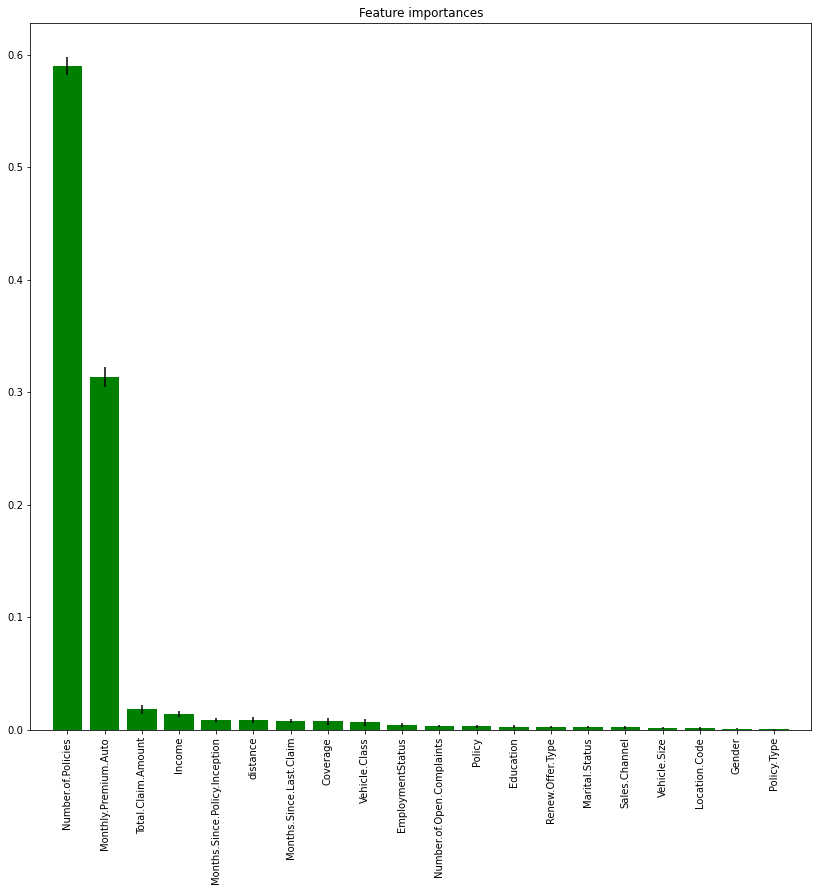

In [84]:
FS.Feature_Selector_visualizer(df)

In [56]:
col_list=['Education','Gender','Location.Code','Marital.Status','Number.of.Open.Complaints','Policy.Type','Policy','Renew.Offer.Type','Sales.Channel','Vehicle.Size']
df = drop.dropper(df)

In [57]:
df.columns

Index(['Customer.Lifetime.Value', 'Coverage', 'EmploymentStatus', 'Income',
       'Monthly.Premium.Auto', 'Months.Since.Last.Claim',
       'Months.Since.Policy.Inception', 'Number.of.Policies',
       'Total.Claim.Amount', 'Vehicle.Class', 'distance'],
      dtype='object')

# Model Creation After Feature Selection

In [58]:
model.Linear_Regression_Model(df)

(2770.3560914301165, 0.2804494866555215)

In [59]:
model.Decision_Tree_Model(df)

(1375.6120140662608, 0.8225883981885838)

In [60]:
model.Random_Forest_Model(df)

(934.563500907134, 0.9181143636494224)

In [61]:
model.Extreme_Gradient_Boosting_Model(df)

(925.4011273386546, 0.9197120913940352)

 # Model CrossValidation

In [103]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
class Regression_Cross_Validator():

    def __init__(self,n_estimators=100,random_state=42,max_depth=10):
        print("Cross Validation object created")

    def Cross_Validated_Random_Forest_Model(self,data):
        param_grid = [
        {'n_estimators': [10, 100], 'max_features': [5, 60], 
         'max_depth': [10, 200, None], 'bootstrap': [True, False]}
        ]

        x = df.drop(['Customer.Lifetime.Value'],axis=1)
        y = df['Customer.Lifetime.Value']
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
        regressor = RandomForestRegressor(n_estimators=100,random_state=29,max_depth=12)
        reg=regressor.fit(x_train,y_train)
        grid_search_forest = GridSearchCV(regressor, param_grid, cv=10, scoring='neg_mean_squared_error')
        grid_search_forest.fit(x_train, y_train)

        grid_best= grid_search_forest.best_estimator_.predict(x_test)
        grid_mse = metrics.mean_squared_error(y_test, grid_best)
        grid_rScore = r2_score(y_test, grid_best)
        grid_rmse = np.sqrt(grid_mse)
        return grid_rmse,grid_rScore
    
    def Cross_Validated_Extreme_Gradient_Boosting_Model(self,data):
        params={
         "learning_rate"    : [0.05, 0.1] ,
         "max_depth"        : [ 10,100],
         "n_estimators"     : [ 10, 100],
         "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]

        }

        x = df.drop(['Customer.Lifetime.Value'],axis=1)
        y = df['Customer.Lifetime.Value']
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=44)
        XGBregressor = XGBRegressor(n_estimators=100,random_state=29,max_depth=9,learning_rate=0.07)
        reg=XGBregressor.fit(x_train,y_train)
        grid_search_forest = GridSearchCV(XGBregressor, params, cv=10, scoring='neg_mean_squared_error')
        grid_search_forest.fit(x_train, y_train)

        grid_best= grid_search_forest.best_estimator_.predict(x_test)
        grid_mse = metrics.mean_squared_error(y_test, grid_best)
        grid_rScore = r2_score(y_test, grid_best)
        grid_rmse = np.sqrt(grid_mse)
        return grid_rmse,grid_rScore

In [95]:
cv = Regression_Cross_Validator()

Cross Validation object created


In [92]:
cv.Cross_Validated_Random_Forest_Model(df)

(909.0638403939026, 0.922521917585117)

In [96]:
cv.Cross_Validated_Extreme_Gradient_Boosting_Model(df)

(932.7000398920162, 0.9184405877374697)